<a href="https://colab.research.google.com/github/Unfeir/DS/blob/main/Hw_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

напишіть функцію гіпотези лінійної регресії у векторному вигляді;

In [2]:
def hypothesis(w: np.array, X: np.array):
     return np.dot(X, w)


створіть функцію для обчислення функції втрат у векторному вигляді;

In [74]:
def cost(h: np.array, y: np.array) -> float:

    m = len(y)
    loss = (1 / (2 * m)) * np.sum((h - y) ** 2)
    return loss


реалізуйте один крок градієнтного спуску;

In [10]:
def gradient_step(h, X, y, lr):

    m = len(y)

    # Обчислення гіпотези
    h = np.dot(X, h)

    # Обчислення градієнту
    gradient = (1 / m) * np.dot(X.T, (h - y))

    # Оновлення параметрів
    h -= lr / m * np.dot(X.T, (h - y))

    return h

# знайдіть найкращі параметри
�
⃗
w
  для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень;

In [5]:
data = pd.read_csv('/content/drive/MyDrive/Data sets/Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
df = data[['price', 'area', 'bedrooms', 'bathrooms']]
df.head()

# print(df.dtypes)

,price,area,bedrooms,bathrooms
0,13300000,7420,4,2
1,12250000,8960,4,4
2,12250000,9960,3,2
3,12215000,7500,4,2
4,11410000,7420,4,1


In [ ]:
y = df['price']
X = df[['area', 'bedrooms', 'bathrooms']]
y, X

In [ ]:
scaler = MinMaxScaler()
n_df = scaler.fit_transform(df)
n_df

n_df = pd.DataFrame(n_df, columns=['price', 'area', 'bedrooms', 'bathrooms'])
y_n = n_df['price']
X_n = n_df[['area', 'bedrooms', 'bathrooms']]
y_n, X_n



In [49]:
regressor = LinearRegression()
regressor.fit(X, y)
w = regressor.coef_
w0 = regressor.intercept_
print(f'{w=}')
print(f'{w0=}')

w=array([3.78762754e+02, 4.06820034e+05, 1.38604950e+06])
w0=-173171.6076326361


In [51]:
# normalize data
regressor = LinearRegression()
regressor.fit(X_n, y_n)
w_n = regressor.coef_
w0_n = regressor.intercept_
print(f'{w_n=}')
print(f'{w0_n=}')

w_n=array([0.47714269, 0.17611257, 0.36001286])
w0_n=0.04282739976995403


# знайдіть ці ж параметри за допомогою аналітичного рішення;

In [44]:
X_a = np.column_stack((np.ones(len(X)), X))


w_a = np.linalg.inv(X_a.T @ X_a) @ X_a.T @ y
# print(w)

w0_a = w_a[0]
wa = w_a[1:]

print(f'{w0_a=}')
print(f'{wa=}')

w0_a=-173171.6076326356
wa=array([3.78762754e+02, 4.06820034e+05, 1.38604950e+06])


In [70]:
# normalize data
X_an = np.column_stack((np.ones(len(X_n)), X_n))


w_an = np.linalg.inv(X_an.T @ X_an) @ X_an.T @ y_n
# print(w)

w0_an = w_an[0]
wan = w_an[1:]

print(f'{w0_an=}')
print(f'{wan=}')

w0_an=0.04282739976994872
wan=array([0.47714269, 0.17611257, 0.36001286])


# Власний розрахунок

In [153]:
import random
class MLinearRegression:
  def __init__(self, lr: float = 0.001, th: float = 0.0001, n_epoch: int =10000):
    self.lr = lr
    self.th = th
    self.n_epoch = n_epoch
    self.w = np.array([random.uniform(-1, 1), random.uniform(-1, 1), random.uniform(-1, 1)])
    # print(f'init w= {self.w=}')

  def predict(self, X: np.array) -> list:
    # print(f'{self.w.shape=}')
    return X @ self.w

  def update_w(self, X: np.array, y: np.array):
    m = len(y)
    h = self.predict(X)
    self.w -= self.lr / m * X.T @ (h - y)


  def fit(self, X: np.array, y: np.array):
        last_cost = 1000000
        # print(f"X.shape {X.s/hape}, y.shape {y.shape}")

        for i in range(self.n_epoch):
            self.update_w(X, y)
            new_cost = cost(y, self.predict(X))
            # print(f"{i=}, {self.w=}, {new_cost=}")
            if last_cost - new_cost < self.th:
                break
            last_cost = new_cost

        return new_cost, self.w


mlr = MLinearRegression(lr=0.002, n_epoch=1000000000000, th=0.0001)

mlr.fit(X_n, y_n)
print(mlr.fit(X_n, y_n))



(0.061477546590206156, area         0.720399
bedrooms     0.755259
bathrooms    0.878151
dtype: float64)


порівняйте отримані результати.

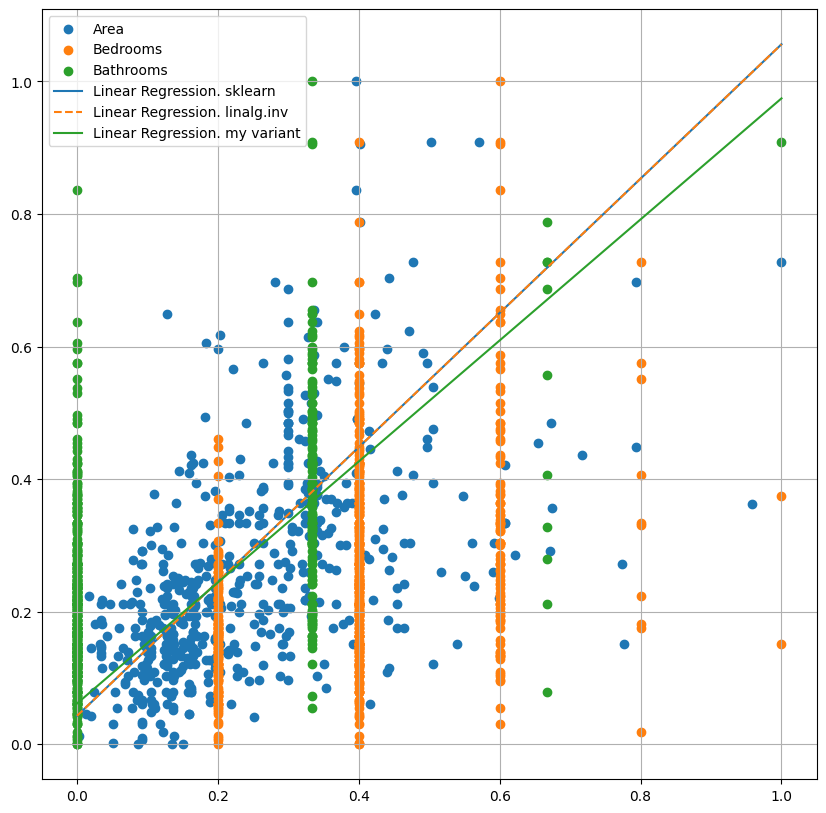

In [154]:
plt.figure(figsize=(10, 10))
plt.scatter(X_n['area'], y_n, label='Area')
plt.scatter(X_n['bedrooms'], y_n, label='Bedrooms')
plt.scatter(X_n['bathrooms'], y_n, label='Bathrooms')
x = np.linspace(np.min(n_df.area), np.max(n_df.area), 3)
plt.plot(x,  [hypothesis((w0_n, w_n[0], w_n[1], w_n[2]), (1, xi, xi, xi)) for xi in x], label='Linear Regression. sklearn')
plt.plot(x,  [hypothesis((w0_an, wan[0], wan[1], wan[2]), (1, xi, xi, xi)) for xi in x], linestyle='dashed', label='Linear Regression. linalg.inv')
plt.plot(x,  [hypothesis((0.061477546590206156, -0.720399, 0.755259, 0.878151), (1, xi, xi, xi)) for xi in x], label='Linear Regression. my variant')
plt.grid()
plt.legend()

In [ ]:
Висновки:
Як можно побачити на графіку, обидва методи розрахунку дали однакові результати

w0_n=0.04282739976995403
w_n=array([0.47714269, 0.17611257, 0.36001286])

аналітичний:
w0_an=0.04282739976994872
wan=array([0.47714269, 0.17611257, 0.36001286])

розрахунок власним методом близький, але не точний